## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf
import os
import keras

In [2]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.17.1
Keras Version 3.5.0


## Q2. Load the Wine Quality dataset and explore its dimensions. Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df = pd.read_csv("/content/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Q3. Check for null values, identify categorical variables, and encode them.

In [23]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [25]:
df.duplicated().sum()

240

In [26]:
df.shape

(1599, 12)

In [27]:
df = df.drop_duplicates(keep='first')

In [28]:
df.duplicated(keep=False)
df.shape

(1359, 12)

In [29]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [30]:
mapping_values = {"bad" : 0, "good" : 1}

In [31]:
df['quality'] = df['quality'].map(mapping_values)

In [33]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [34]:
df["quality"].value_counts()

,count
quality,
1,719
0,640


## Q4. Separate the features and target variables from the dataframe.

In [35]:
X = df.drop(labels=["quality"],axis=1)
y = df["quality"]

In [36]:
X.shape , y.shape

((1359, 11), (1359,))

## Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [37]:
from sklearn.model_selection import train_test_split

#Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
#Further splitting the training data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [38]:
X_train.shape , y_train.shape

((815, 11), (815,))

In [39]:
X_test.shape , y_test.shape

((272, 11), (272,))

In [40]:
X_val.shape , y_val.shape

((272, 11), (272,))

## Q6. Perform scaling on the dataset.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [42]:
from tensorflow.keras.layers import Input, Dense

#Creating layers of ANN
LAYERS = [keras.layers.Input(shape = X_train.shape[1:],name="InputLayer"),
          keras.layers.Dense(200,activation='relu',name="HiddenLayer1"),
          keras.layers.Dense(100,activation='relu',name="HiddenLayer2"),
          keras.layers.Dense(1,activation='sigmoid',name="OutputLayer")
          ]


## Q8. Create a Sequential model and add all the layers to it.

In [43]:
model_clf = keras.models.Sequential(LAYERS)

In [44]:
model_clf.layers

[<Dense name=HiddenLayer1, built=True>,
 <Dense name=HiddenLayer2, built=True>,
 <Dense name=OutputLayer, built=True>]

In [45]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [46]:
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs")

# Fit the model with the TensorBoard callback
model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6798 - loss: 0.6176 - val_accuracy: 0.7316 - val_loss: 0.5231
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7386 - loss: 0.5103 - val_accuracy: 0.7353 - val_loss: 0.5174
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7423 - loss: 0.5219 - val_accuracy: 0.7353 - val_loss: 0.5163
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7248 - loss: 0.5225 - val_accuracy: 0.7426 - val_loss: 0.5222
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7539 - loss: 0.4843 - val_accuracy: 0.7463 - val_loss: 0.5146
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7678 - loss: 0.4818 - val_accuracy: 0.7390 - val_loss: 0.5216
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7928 - loss: 0.4494 - val_accuracy: 0.7279 - val_loss: 0.5250
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7915 - loss: 0.4762 - val_accuracy: 0.7463 - val_lo

In [47]:
%load_ext tensorboard

In [48]:
!pip show tensorboard

Name: tensorboard
Version: 2.17.1
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, grpcio, markdown, numpy, packaging, protobuf, setuptools, six, tensorboard-data-server, werkzeug
Required-by: tensorflow


## Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [49]:
# Create a Early Stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with the Early Stopping callback
model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7912 - loss: 0.4419 - val_accuracy: 0.7500 - val_loss: 0.5185
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8284 - loss: 0.3949 - val_accuracy: 0.7390 - val_loss: 0.5314
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7965 - loss: 0.4241 - val_accuracy: 0.7463 - val_loss: 0.5288
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8087 - loss: 0.4046 - val_accuracy: 0.7574 - val_loss: 0.5233
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8091 - loss: 0.4021 - val_accuracy: 0.7537 - val_loss: 0.5301
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7912 - loss: 0.4242 - val_accuracy: 0.7426 - val_loss: 0.5368


## Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [50]:
# Create a ModelCheckpoint callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Fit the model with the Early Stopping callback
model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint_cb])

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=my_keras_model.h5

## Q12. Print the model summary.

In [51]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ HiddenLayer1 (Dense)                 │ (None, 200)                 │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,805 (264.87 KB)

 Trainable params: 22,601 (88.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,204 (176.58 KB)

## Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [52]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

## Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [56]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [59]:
CALLBACKS = [early_stopping_cb,early_stopping_cb]
history = model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks= CALLBACKS )

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8020 - loss: 0.4472 - val_accuracy: 0.7390 - val_loss: 0.5250
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7819 - loss: 0.4291 - val_accuracy: 0.7390 - val_loss: 0.5239
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8167 - loss: 0.4036 - val_accuracy: 0.7316 - val_loss: 0.5244


 ## Q16. Get the model's parameters.

In [60]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 26}

## Q17. Store the model's training history as a Pandas DataFrame.

In [61]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.787730,0.448564,0.738971,0.525037
1,0.790184,0.433440,0.738971,0.523949
2,0.807362,0.425427,0.731618,0.524354


## Q18. Plot the model's training history.

<Axes: >

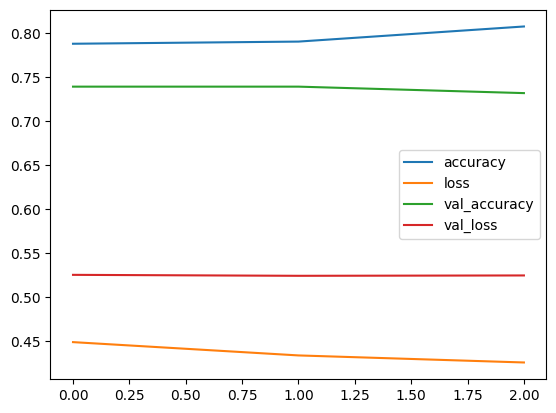

In [62]:
pd.DataFrame(history.history).plot()

## Q19. Evaluate the model's performance using the test data.

In [63]:
model_clf.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7218 - loss: 0.5280  


[0.5144709944725037, 0.7389705777168274]

In [64]:
x_new = X_test[:10]

In [65]:
actual = y_test[:10]
actual

,quality
55,0
1291,1
1544,1
593,0
1261,0
491,1
1004,0
889,0
1154,1
824,0


In [66]:
y_prob = model_clf.predict(x_new)
y_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


array([[0.38655424],
       [0.86148095],
       [0.980403  ],
       [0.21554965],
       [0.5814252 ],
       [0.99293643],
       [0.6350903 ],
       [0.0746334 ],
       [0.935309  ],
       [0.35204005]], dtype=float32)

In [67]:
y_prob.round(3)

array([[0.387],
       [0.861],
       [0.98 ],
       [0.216],
       [0.581],
       [0.993],
       [0.635],
       [0.075],
       [0.935],
       [0.352]], dtype=float32)

In [68]:
# Predict with threshold set as 0.5
thr = 0.5
ypred = []
for i in y_prob:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [69]:
actual

,quality
55,0
1291,1
1544,1
593,0
1261,0
491,1
1004,0
889,0
1154,1
824,0


In [70]:
ypred

[0, 1, 1, 0, 1, 1, 1, 0, 1, 0]

In [71]:
actual = list(actual)
actual

[0, 1, 1, 0, 0, 1, 0, 0, 1, 0]